# TP1 : propagation of a sound wave and acquisition with a microphone array

## Réalisé par : 
     - BOUHAFS Zakaria N°28612466 M2 ISI.
     - GHOUL Branis N°28612738 M2 ISI.

## 1.1 In preparation

##### 1. Express $z_{n}$ as a function of the spacing d between the microphones

$$ z_{n} = (n - \frac{N+1}{2})d $$

Or 

$$ z_{n} = (2n - N-1)\frac{d}{2} $$

### 1.1.1 Wave fronts : 

#### Assumption 1 : the wave front is assumed to be a plane, cf. Fig1.

##### 2. Express dn as a function of zn and the angle ✓s, which is the angle of incidence defined with respect to the axis [O, z] of the microphone array.

From figure 1 we can write :

$$ cos(θ_{n}) = \frac{d_{n}}{z_{n}}    \Longrightarrow     d_{n} =  z_{n}cos(θ_{n}) $$  

##### 3. Deduce the angle of incidence $θ_{n}$, as a function of the delay $\delta_{\tau_{n}}.$

We know that :

$$ \tau_{n}(r_{s}) = \frac{d_{n}}{c} $$  

and  with replacing $d_{n}$ formula found in 2 we got :  $$ \tau_{n}(r_{s}) = \frac{z_{n}}{c}cos(θ_{n}) $$ 
So : 
$$ \theta_{s} = arccos(\frac{\tau_{n}c}{z_{n}}) $$

### Assumption 2 : the wave front is assumed to be spherical, cf. Fig2.

##### 4. Express the (Cartesian) coordinates of the source $(xs, zs)$ as a function of the distance $r_{s}$ between the source and the centre of the microphone array, the position of the $n^{th}$ microphone $z_{n}$, the distance $d_{n}$ and the angles $\alpha_{n}$ and $d\alpha_{n}$, the angle between the wave arriving at the $n^{th}$ microphone and that arriving at O.

Let's consider the triangle formed by the angle $\alpha_{s}$ and $d\alpha_{n}$.

So : cos($\alpha_{s}$ + $d\alpha_{n}$) = $\frac{x_{s}}{r_{n}}$ .............. (1)


We know that : $$ r_{s} - r_{n} = \sqrt{r_{s}^2 + z_{n}^2 - 2r_{s}z_{n}cos(\theta_{s})} $$
$$ \Longrightarrow   r_{n} = r_{s} - \sqrt{r_{s}^2 + z_{n}^2 - 2r_{s}z_{n}cos(\theta_{s})} $$

We replace $r_{n}$ in (1) we find : 

cos($\alpha_{s}$ + $d\alpha_{n}$) = $\frac{z_{s}}{r_{s} - \sqrt{r_{s}^2 + z_{n}^2 - 2r_{s}z_{n}cos(\theta_{s})}}$

then, $ z_{s}$ = $ $ cos($\alpha_{s}$ + $d\alpha_{n}$)$$ [r_{s} - \sqrt{r_{s}^2 + z_{n}^2 - 2r_{s}z_{n}cos(\theta_{s})}] $ 

We have also, $$ r_{n} = r_{s} + d_{n} $$
By similarity, 
$$ r_{s} + d_{n} = r_{s} - \sqrt{r_{s}^2 + z_{n}^2 - 2r_{s}z_{n}cos(\theta_{s})} $$  

So , $$ cos(\alpha_{s} + d\alpha_{n}) = \frac{r_{s} + d_{n}} $$


we know that : $$ r_{n} = r_{s} + d_{n} $$
So : $$ x_{s} = [r_{s} + d_{n}]cos(\alpha_{s} + d\alpha_{n}) $$

And : $$ z_{s} à compléter $$



##### 5. Deduce the equation verified by $d_{n}$ : 
$$ d_{n}^2 + 2d_{n}r_{s} = z_{n}^2 - 2r_{s}z_{n}cons(\theta_{s}) $$



We know that : 
$$ ||d_{n} + r_{s}|| = \sqrt{r_{s}^2 + z_{n}^2 - 2r_{s}z_{n} \cos(\theta_{s})} $$

by squaring the equation, we obtain : 
$$ d_{n}^2 + 2d_{n}r_{s} = z_{n}^2 - 2r_{s}z_{n}cons(\theta_{s}) $$

##### 6. Propose a method to derive the position of the source, given by the angle of incidence $\theta_{s}$ swith respect to the axis [O, z) of the microphone array, and its distance from the origin $r_{s}$


$$ \frac{dx_{s}}{d\theta_{s}} = \frac{dx_{s}}{d\alpha_{s}} \frac{d\alpha_{s}}{d\theta_{s}} $$


The same thing for $z_{s}$





##### 7. What happens to equation (1) when $r_{s} \rightarrow \infty $? Conclude

We have : $$ d_{n}^2 + 2d_{n}r_{s} = z_{n}^2 - 2r_{s}z_{n}cons(\theta_{s}) $$

We know tha if $r_{s} \rightarrow \infty$ We'll find : $$2d_{n}r_{s} >> d_{n}^2$$ and $$-2r_{s}z_{n}cos(\theta_{s}) >> z_{n}^2 $$ 

So (1) become:
$$ 2d_{n}r_{s} = - 2r_{s}z_{n}cos(\theta_{s}) $$
$$ d_{n} = - z_{n}cos(\theta_{s}) $$


Which means that we are in the case of **planar wavefront**

## 1.2 In session

In [5]:
# All required import
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
from client import array
import time
%matplotlib notebook

### 1.2.1 Getting started

To begin, start the acquisition of the audio system, and capture one audio buffer. Plot the resulting signals as a function of time.

### 1.2.2 Speed of sound

##### Q.1, Q.2 and Q.3

In [2]:
antenne=array('play') # When playing recorded files (can work without acquisition system)

In [3]:
# Load acquisition and array parameters from the antenne variable, AFTER launching acquisition or play
Fs = antenne.fs
BLK = antenne.blocksize
N = antenne.mems_nb
d = antenne.interspace

# Read an audio buffer
m = antenne.read()

In [9]:
def display_time_signal(audio_buffer, 
                        indexs_of_buffer,
                        title,
                        fig_size=(8, 5),
                        xlim=(0.04, 0.06),
                        BLK=BLK,
                        Fs=Fs):
    
    T = np.arange(0, BLK/Fs, 1/Fs)
    plt.figure(figsize=fig_size)
    plt.xlabel('t[s]')
    plt.ylabel('amplitude')
    for i in indexs_of_buffer:
        plt.plot(T, audio_buffer[i,:], label=f'microphone {i}')
        plt.legend()
        plt.xlim(xlim)
 
    plt.suptitle(title)
    plt.grid()
    plt.show()

<IPython.core.display.Javascript object>


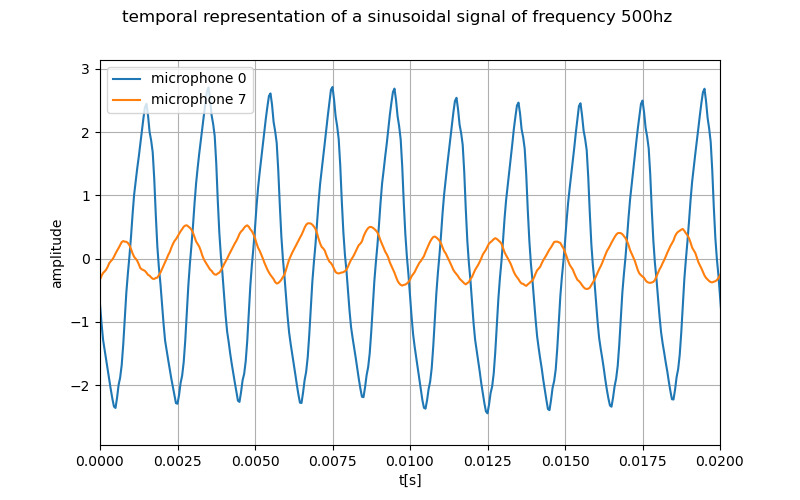

In [5]:

display_time_signal(audio_buffer=m, 
                    indexs_of_buffer=[0, 7], 
                    xlim=(0.00, 0.02),
                    title='temporal representation of a sinusoidal signal of frequency 500hz ')

In [5]:
def celirity(delay):
    return  0.42 / delay

In [25]:
celirity(1.23*10**(-3))

336.0

In [3]:
antenne=array('play') # When playing recorded files (can work without acquisition system)

In [4]:
# Load acquisition and array parameters from the antenne variable, AFTER launching acquisition or play
Fs = antenne.fs
BLK = antenne.blocksize
N = antenne.mems_nb
d = antenne.interspace

# Read an audio buffer
m = antenne.read()

<IPython.core.display.Javascript object>


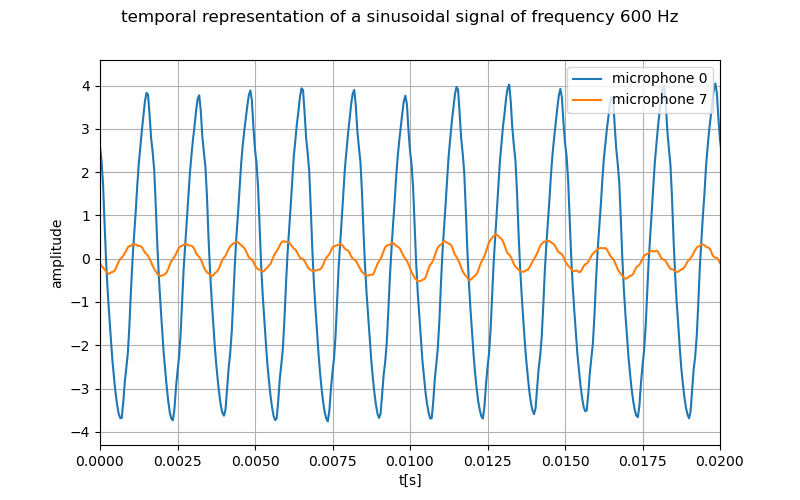

In [7]:

display_time_signal(audio_buffer=m, 
                    indexs_of_buffer=[0, 7], 
                    xlim=(0.00, 0.02),
                    title='temporal representation of a sinusoidal signal of frequency 600 Hz')

In [9]:
celirity(1.24*10**(-3))

311.1111111111111

In [3]:
antenne=array('play') # When playing recorded files (can work without acquisition system)

In [7]:
# Load acquisition and array parameters from the antenne variable, AFTER launching acquisition or play
Fs = antenne.fs
BLK = antenne.blocksize
N = antenne.mems_nb
d = antenne.interspace

# Read an audio buffer
m = antenne.read()

<IPython.core.display.Javascript object>


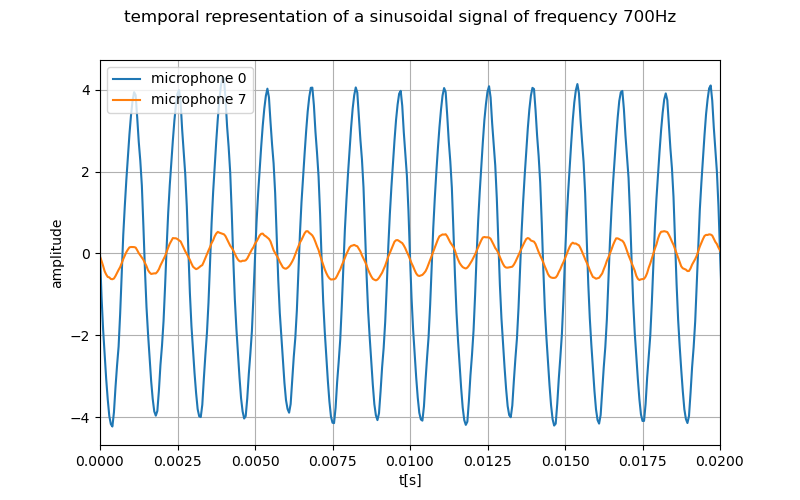

In [10]:
display_time_signal(audio_buffer=m, 
                    indexs_of_buffer=[0, 7],
                    xlim=(0.00, 0.02),
                    title='temporal representation of a sinusoidal signal of frequency 700Hz')

In [13]:
celirity(1.25*10**(-3))

336.0

In [3]:
antenne=array('play') # When playing recorded files (can work without acquisition system)

In [4]:
# Load acquisition and array parameters from the antenne variable, AFTER launching acquisition or play
Fs = antenne.fs
BLK = antenne.blocksize
N = antenne.mems_nb
d = antenne.interspace

# Read an audio buffer
m = antenne.read()

<IPython.core.display.Javascript object>


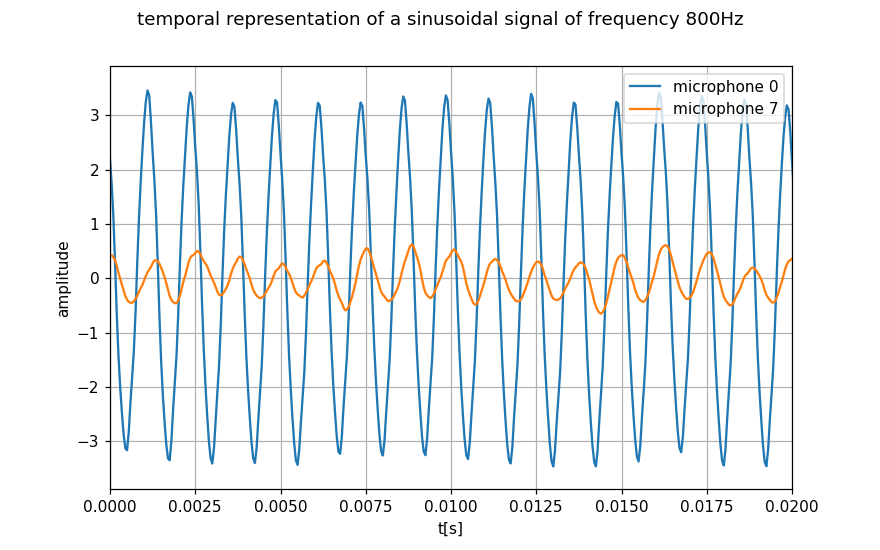

In [8]:
display_time_signal(audio_buffer=m, 
                    indexs_of_buffer=[0, 7], 

                    xlim=(0.00, 0.02),
                    title='temporal representation of a sinusoidal signal of frequency 800Hz')

In [6]:
celirity(2.4*10**(-4))

1750.0

In [2]:
antenne=array('play') # When playing recorded files (can work without acquisition system)

In [3]:
# Load acquisition and array parameters from the antenne variable, AFTER launching acquisition or play
Fs = antenne.fs
BLK = antenne.blocksize
N = antenne.mems_nb
d = antenne.interspace

# Read an audio buffer
m = antenne.read()

<IPython.core.display.Javascript object>


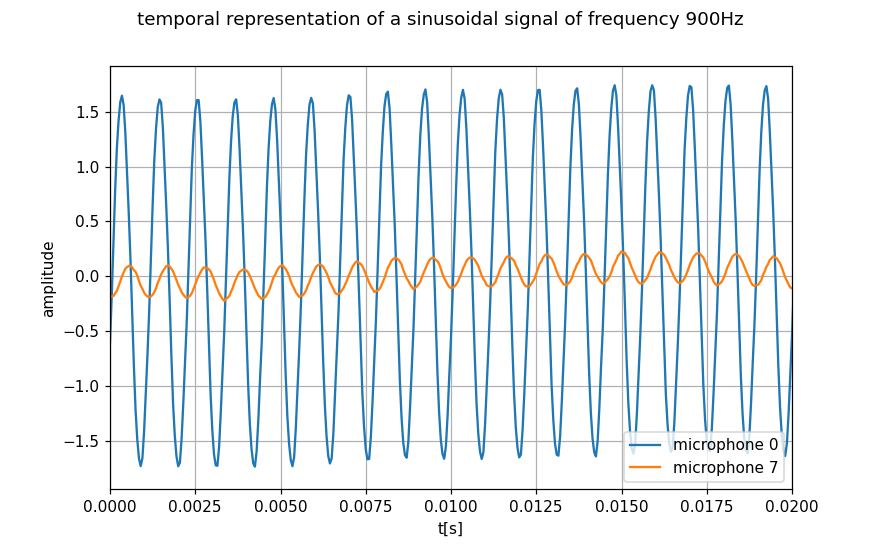

In [7]:
display_time_signal(audio_buffer=m, 
                    indexs_of_buffer=[0, 7], 
                    xlim=(0.00, 0.02),
                    title='temporal representation of a sinusoidal signal of frequency 900Hz')

In [8]:
celirity(1.3*10**(-4))

3230.76923076923

- Phase shift between the signal acquired by the two microphones m0 and m7 :   
Sound is a disturbance of matter propagating in an elastic medium, in our case air. The propagation speed of sound is estimated at 340m/s in the initial conditions. The two microphones m0 and m7 are 42 cm apart, this explains the delay of acquisition of microphone m7 compared to m0.
 
- Attenuation of the signal acquired by m7 compared to m0 :  
As the wave moves away from the source, the sound energy spreads over the surface of an increasingly large sphere. Consequently, the amplitude of the wave decreases. This phenomenon is called geometric divergence.

- Nevertheless, the two microphones m0 and m7 have the same period, which means that they are picking up a sound signal from the same source.  

- Signal m7 is delayed in relation to signal m0, which means that the source is placed near microphone m0 and directed towards microphone m7.

- To estimate the right value of the temporal phase shift between two microphones, it is essential to choose an acquisition frequency that allows us to visualize the phase shift phenomenon. To do this, we have made several acquisitions of sound waves with different frequencies ranging from 200 to 1000 Hz. At each acquisition we calculate the temporal phase shift and thus deduce the speed of the sound wave. From the 500 Hz, the results obtained are no longer consistent because the temporal representation of the two signals overlap, it is difficult to know what are the parts of the signal to visualize to reprocess the phase shift.

#### Q.4

In [2]:
antenne=array('play') # When playing recorded files (can work without acquisition system)

In [24]:
# Load acquisition and array parameters from the antenne variable, AFTER launching acquisition or play
Fs = antenne.fs
BLK = antenne.blocksize
N = antenne.mems_nb
d = antenne.interspace

# Read an audio buffer
m = antenne.read()

In [10]:
# Q 1.2.2.4
def display_frequency_response( audio_buffer, 
                                indexs_of_buffer,
                                title, 
                                fig_size=(15, 5),
                                noise=False, 
                                Fs=Fs,
                                mode=True): 
    if mode: 
        num_figurs = 2 * len(indexs_of_buffer)
        fig, axes = plt.subplots(num_figurs//2, 2, figsize=fig_size)
        # make a little extra space between the subplots
        fig.subplots_adjust(hspace=0.5)


        x = []
        for i in indexs_of_buffer:
            x.append(i); x.append(i)

        #The frequency axis
        f = np.fft.fftfreq(audio_buffer[0].size, d=1/Fs)
        for ax, i, cpt in zip(list(axes.flat), x, range(num_figurs)):
            if cpt%2 != 0:
                ax.plot(f, np.abs(np.fft.fft(audio_buffer[i])), label=f"micro{i}" )
            else:
                ax.plot(f, np.angle(np.fft.fft(audio_buffer[i])), label=f"micro{i}")
            ax.grid()
            ax.legend()

        plt.suptitle(title)
    else : 
        f = np.fft.fftfreq(audio_buffer[0].size, d=1/Fs)
        angle_0=np.angle(np.fft.fft(audio_buffer[0]))
        angle_7=np.angle(np.fft.fft(audio_buffer[7]))
        plt.figure()
        plt.plot(f,angle_0, label=f"micro{0}" )
        plt.plot(f,angle_7, label=f"micro{7}" )
        plt.xlabel("frequence [hz]")
        plt.ylabel("phase[radian]")
        plt.title("delay calculation from the phase for f=500 hz")
    
        plt.xlim(0,1000)
        print(f"phase pour le micro {0}:{angle_0[freq-1]}\npahse pour le micro {7}:{angle_7[freq-1]}")
        print("déphasage :",angle_7[freq-1]-angle_0[freq-1])
        plt.grid()
        plt.show()
        plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


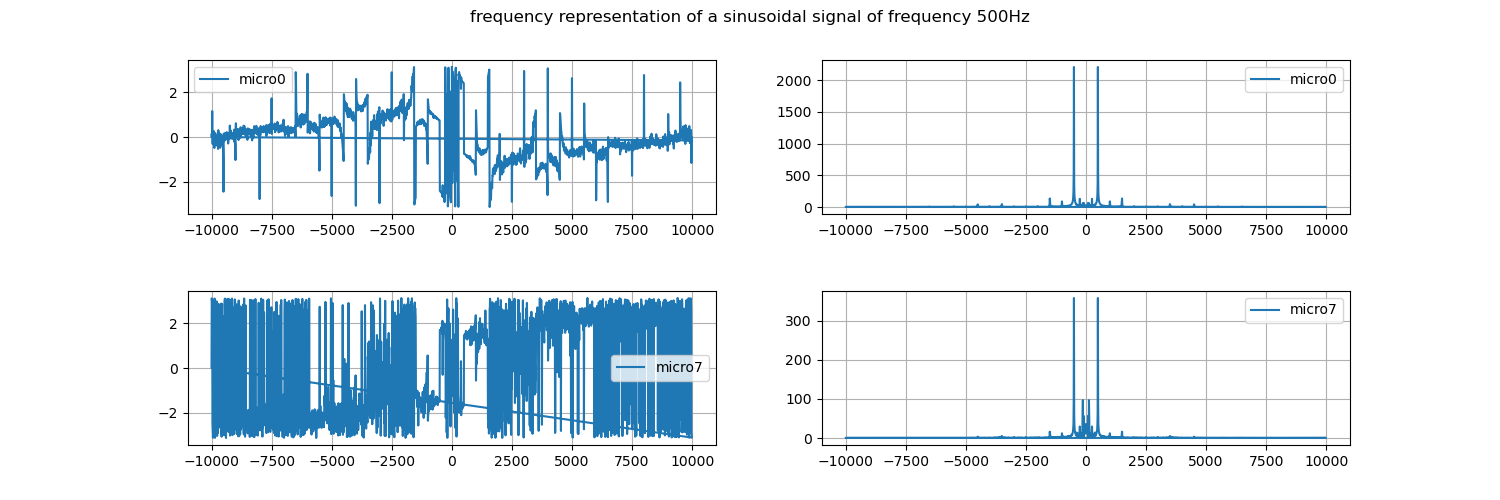

In [43]:
display_frequency_response( audio_buffer=m, 
                            indexs_of_buffer=[0, 7], 
                            xlim=(0.00, 0.02),
                            title='frequency representation of a sinusoidal signal of frequency 500 hz')

- The frequency responses of the two microphones m0 and m7 are almost identical, as for the time domain, we notice the attenuation of the signal via the difference in amplitude of the FFT of micro 0 and 7.
- We notice that the signal is a bit noisy, but we find our peak at 500 Hz as we expected. The fft also shows peaks in the low frequencies which can be explained by the working environment when taking the measurements. The frequencies around 150 Hz may correspond to people talking and the neon tube has a frequence of 50 Hz.

#### Q.5

<IPython.core.display.Javascript object>


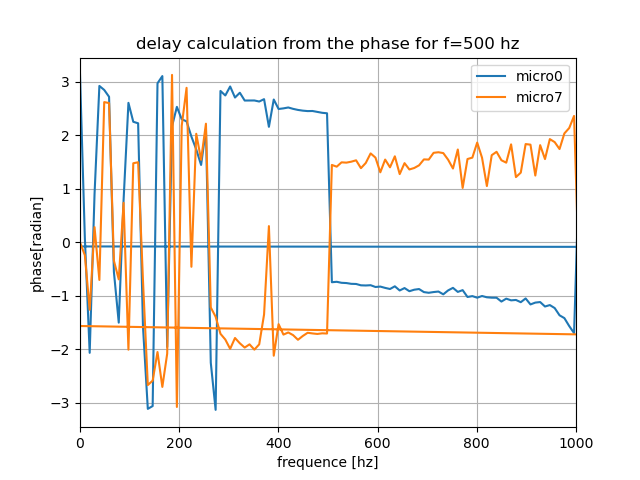

phase pour le micro 0:-0.8762157169252653
pahse pour le micro 7:2.6072927267988253
déphasage : 3.483508443724091


In [39]:
display_frequency_response( audio_buffer=m, 
                            indexs_of_buffer=[0, 7], 
                            title='frequency representation of a sinusoidal signal of frequency 500Hz',
                            mode=False)

The calculation of the delay of the are using the method of observation of the signal:    
1. To carry out an acquisition of a sound signal   
    - To facilitate the graphic reading, it is preferable to work with a periodic signal.   
    - To facilitate the calculation of the travel time of the wave from one microphone to another, it is advisable to place the sound source in the $(O, Z)$ axis.  
2. Plot the two time signals acquired by the first and last microphone $(m0 and m7)$ in the same graph.  
3. Measure graphically the time between the two signals.  

The calculation of the speed of the are using the method of observation of the phase:  
1. To carry out an acquisition of a sound signal   
    - To facilitate the graphic reading, it is preferable to work with a periodic signal.   
    - To facilitate the calculation of the travel time of the wave from one microphone to another, it is advisable to place the sound source in the $(O, Z)$ axis.   
2. Plot the two time signals acquired by the first and last microphone $(m0 and m7)$ in the same graph.   
3. Plot the frequency (phase) representation of the two signals m0 and m7.  
2. Measure graphically the angle between the two signals at a frequency f. (dϕ = ϕ1 - ϕ2).  
3. t = dϕ / (2 ∗ pi ∗ f).  

First method : With a delay of 0.00123 second.  
Second method : With phase shift of  3.48350 radian,  the delay is 0.0011 second.

#### Q.6

celerity = d/t.  
d : Distance between the two microphones m0 and m7, 42cm.  
t : Temporal phase shift between two microphones m0 and m7.

First method we a have a delay of 0.00123 second so we we will have : 
c_1 = 341.46 m/s

Second method we a have a delay of 0.0011 second so we we will have : 
c_1 = 381.81 m/s

as seen in class we have the speed of sound which is equal to 342 m/s for T=20°, the first method gives us an almost identical result but for the 2nd method we have a difference of 38.81 m/s, this last one is justified by the fact that we lose in precessions their of the calculation of the FFT (from where the importance of the choice of the good number of point in addition to the noise which we have) 


#### Q.7

In [3]:
antenne=array('play') # When playing recorded files (can work without acquisition system)

In [7]:
# Load acquisition and array parameters from the antenne variable, AFTER launching acquisition or play
Fs = antenne.fs
BLK = antenne.blocksize
N = antenne.mems_nb
d = antenne.interspace

In [8]:
# Read an audio buffer
m = antenne.read()

<IPython.core.display.Javascript object>


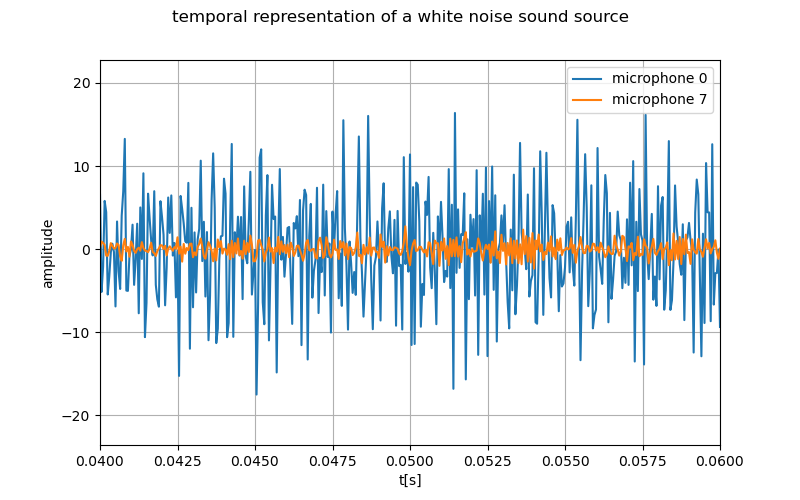

In [12]:

display_time_signal(audio_buffer=m, 
                    indexs_of_buffer=[0, 7], 
                    title='temporal representation of a white noise sound source')

<IPython.core.display.Javascript object>


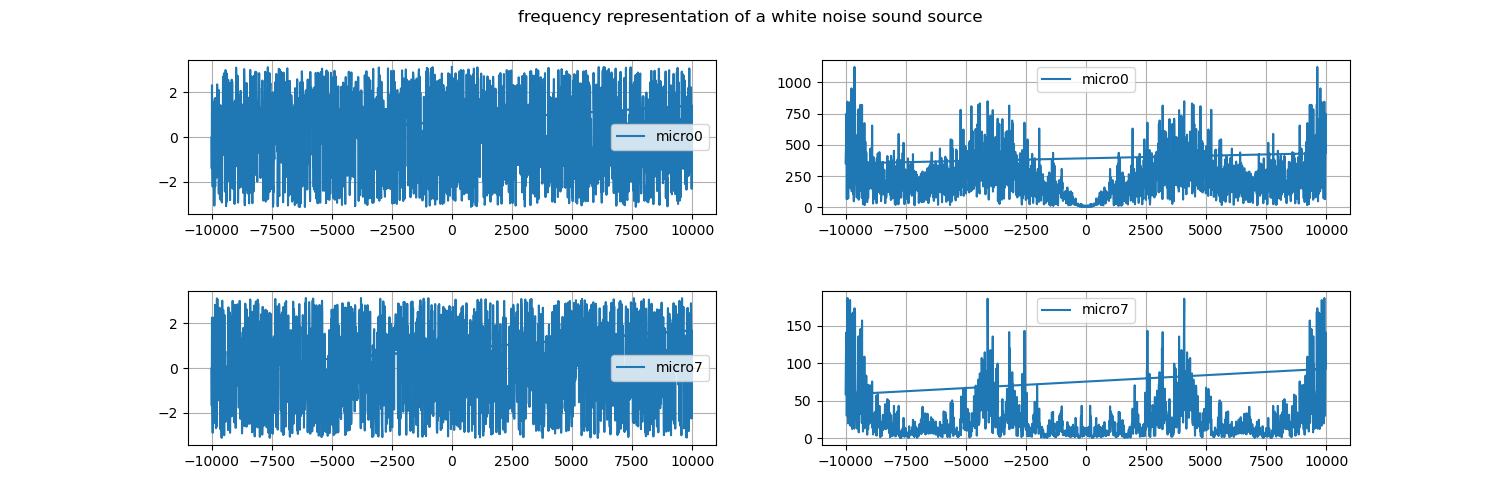

In [15]:
display_frequency_response( audio_buffer=m, 
                            indexs_of_buffer=[0, 7],  
                            title='frequency representation of a white noise sound source')

White noise is a randomly generated tone combining all sound frequencies simultaneously. This makes it impossible to know or mathematically represent white noise. Therefore, it is not possible to estimate the delay time of sound probing between different microphones. However, there are methods that allow us to calculate the celerity of a white noise, and we proceeded as follows:  

1. calculate the ratio of the moduli of the FFT of the two signals acquired by the
two microphones m0 and m7.     
2. Calculate the phase of the ratio of the moduli of the FFT.  
3. Calculate the speed, speed = dist / delay_time. (see the `speed_of_sound` function). 

In [19]:

def speed_of_sound(audio_buffer, 
                   dist_micro=0.06,
                   noise=False):
    
    first_micro = {'sound':audio_buffer[0, :], 'position': 0}
    last_micro  = {'sound':audio_buffer[-1, :], 'position':audio_buffer.shape[0]-1}

    new_phase = np.angle(np.fft.fft(first_micro['sound']) / np.fft.fft(last_micro['sound']))
    ind_f0 = np.argmax(np.fft.fft(first_micro['sound']))
    f0 = np.max(np.fft.fft(first_micro['sound']))

    if noise:
        f0 /= 2

    dist = abs(first_micro['position'] - last_micro['position']) * dist_micro
    phase_shift = new_phase[ind_f0]
    delay_time = np.abs(phase_shift / (2*np.pi*f0))

    speed = dist / delay_time

    return speed

In [187]:
speed_white_noise=speed_of_sound(audio_buffer=m, 
               dist_micro=0.06, 
               noise=True)
print(" estimate the speed of sound using the phase difference of the two DFTs:",speed_white_noise," m/s.")

383.0046772477279

#### Q.8

- The first two methods give similar results and very close to the real value. 

- The last method performs more calculations, but calculates the delay without having to resort to graphical reading, which minimizes the error.  

#### Q.9, Q.10 and Q.11

In [205]:
antenne=array('play') # When playing recorded files (can work without acquisition system)

In [206]:
# Load acquisition and array parameters from the antenne variable, AFTER launching acquisition or play
Fs = antenne.fs
BLK = antenne.blocksize
N = antenne.mems_nb
d = antenne.interspace

In [210]:
# Read an audio buffer
m = antenne.read()

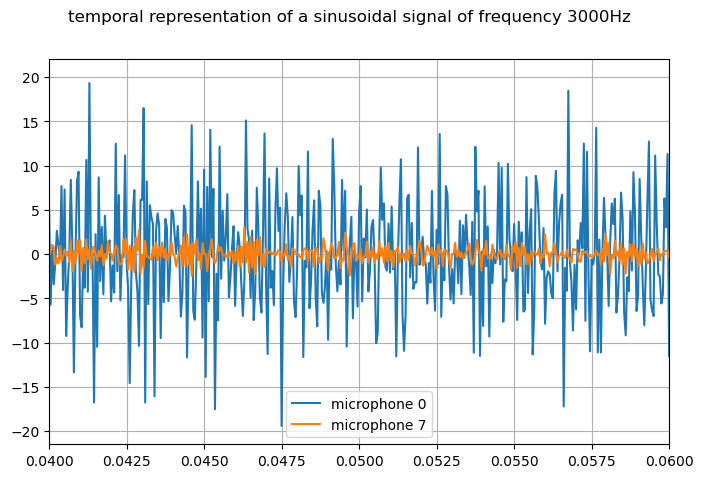

In [211]:

display_time_signal(audio_buffer=m, 
                    indexs_of_buffer=[0, 7], 
                    title='temporal representation of a sinusoidal signal of frequency 3000Hz')

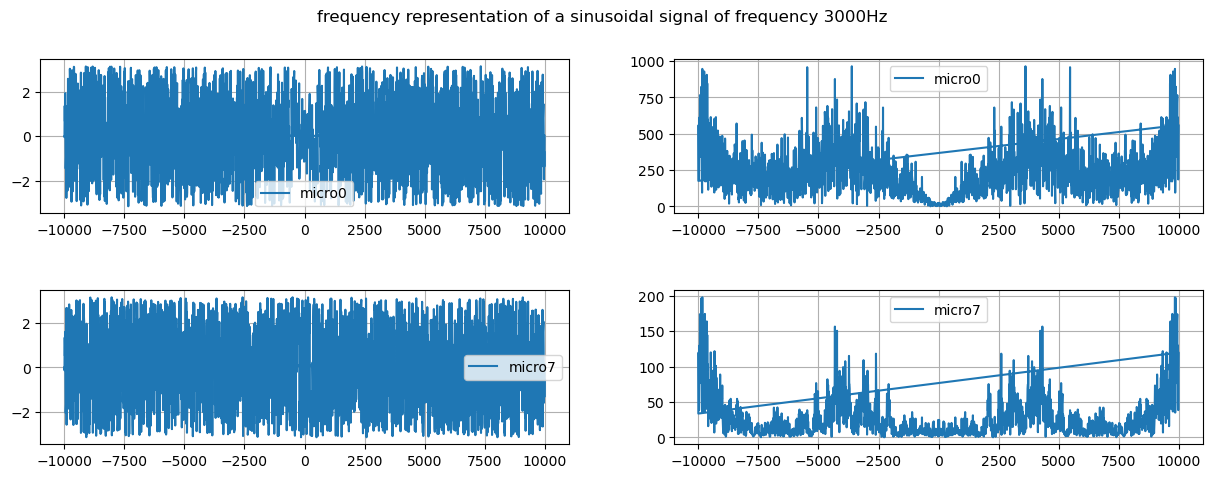

In [212]:
display_frequency_response( audio_buffer=m, 
                            indexs_of_buffer=[0, 7], 
                            title='frequency representation of a sinusoidal signal of frequency 3000Hz')

First method  : With a delai of 0.00013 s, the speed is     : 4215.08 $\frac{m}{s}$.  
Second method : With phase shift of 0.00019 s, the speed is : 2020.33 $\frac{m}{s}$.  


At the frequency f=3000Hz the calculation of the velocity is wrong. The reason is the following:  

$\tau$ = $\frac{\Delta \phi}{2*\pi*f}$   /   $\Delta \phi$ = $2*\pi*f$.  

However, it is necessary to have :   
$\Delta \phi$ <  $2*\pi$. If we don't respect this condition the signals acquired by m0 and m7 overlap, that is to say we can't see which signal is ahead of the other. Therefore, the graphical reading of the delay is impossible.  


$\to 2*\pi*f < 2*\pi$.      
$\to f < \frac{1}{\tau}$.   

such as :  
$\Delta \phi$ : Phase shift.  
$\tau$ : Delay.  

To T = $20°$ we have C = 342 $\frac{m}{s}$.  

$\to C =  \frac{d}{\tau}$.  
$\to \tau =  \frac{d}{C} = \frac{6 * 7*10^{-2}}{342}$.  
$\to \tau = 1.228*10^{-3}$.  
$\to f_{min} <  \frac{1}{\tau}$.  
$\to f_{min} <  814 Hz$.   






### 1.2.3 Radiation from the source

In [2]:
antenne=array('play') # When playing recorded files (can work without acquisition system)

In [3]:
# Load acquisition and array parameters from the antenne variable, AFTER launching acquisition or play
Fs = antenne.fs
BLK = antenne.blocksize
N = antenne.mems_nb
d = antenne.interspace

# Read an audio buffer
m = antenne.read()

<IPython.core.display.Javascript object>


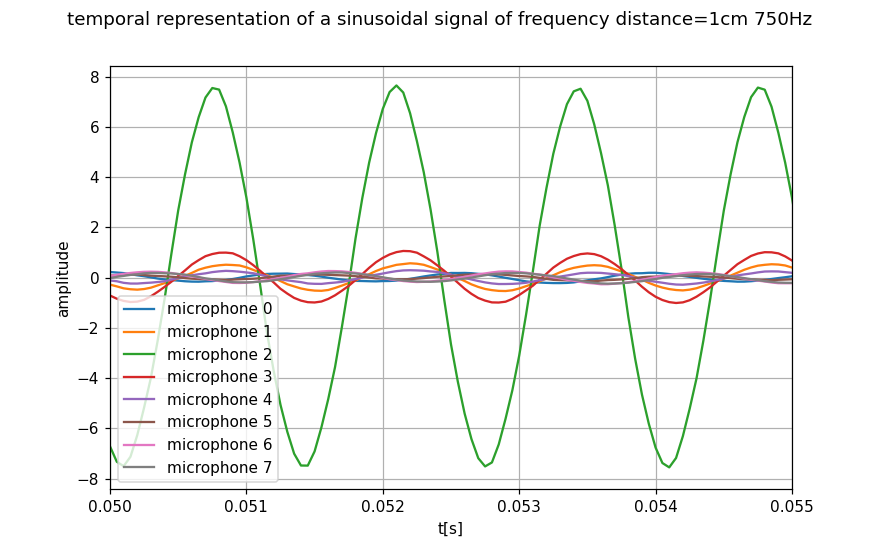

In [20]:

display_time_signal(audio_buffer=m, 
                    indexs_of_buffer=range(8), 
                    xlim=(0.05, 0.055),
                    title='temporal representation of a sinusoidal signal of frequency=750 Hz and distance=1cm)

<IPython.core.display.Javascript object>


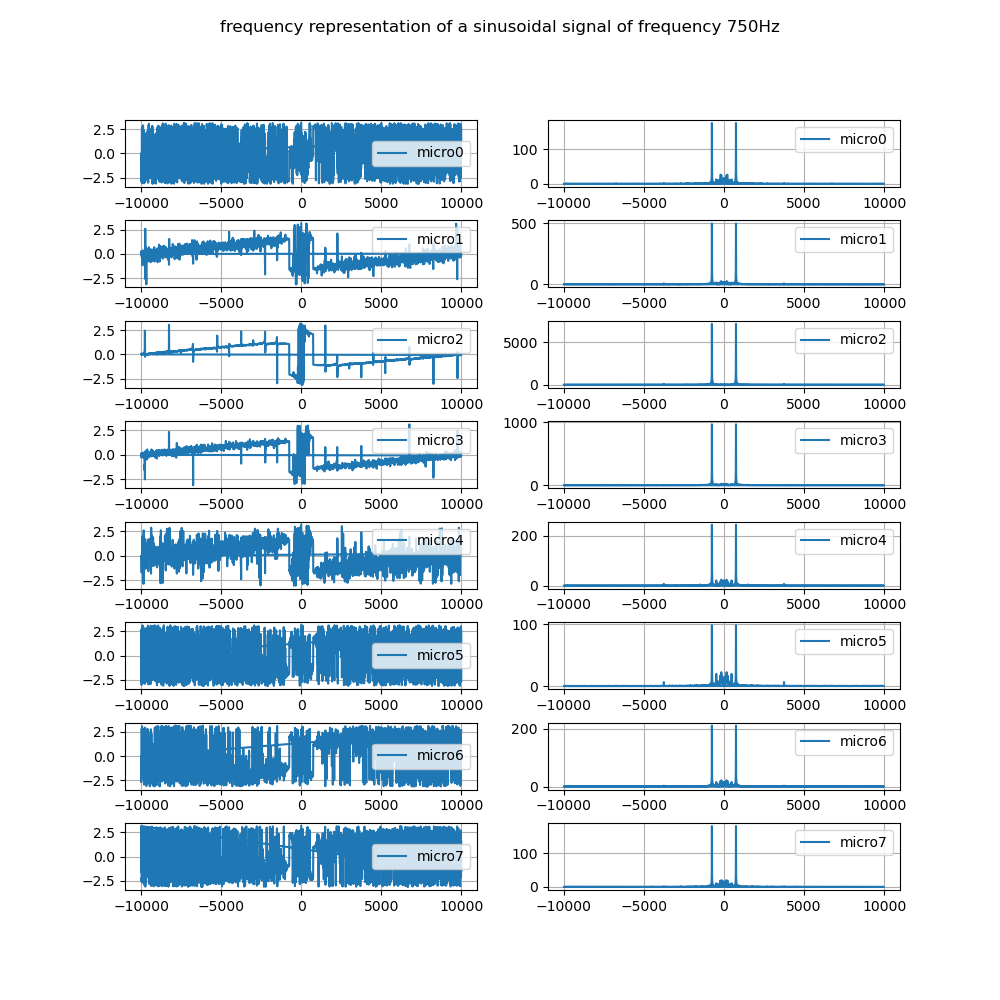

In [10]:
display_frequency_response( audio_buffer=m, 
                            indexs_of_buffer=range(8), 
                            fig_size=(10, 10), 
                            title='frequency representation of a sinusoidal signal of frequency=750 Hz and distance=1cm')

The RMS power is the reference value in the hi-fi world. It corresponds to the average continuous power that a speaker can accept without damage. In the case of an amplifier, it represents the continuous power that the latter can deliver, without weakening or clipping.  

RMS = $\sqrt{\frac{\sum_{i=1}^{n} \alpha_{i}^2}{n}}$.  
   
We need to measure the RMS to evaluate the average loudness of the audio signals acquired by the microphone array. The RMS result is the average of the audio signal. This will give us a more accurate picture of the loudness. Using measurement tools to visualize the average RMS value will also help to avoid distortion.

In [11]:
# https://stackoverflow.com/questions/40963659/root-mean-square-of-a-function-in-python
RMS = np.sqrt(np.mean(m**2))
print(f'RMS à 750Hz = {RMS}')

RMS à 750Hz = 1.8867878827738649


#### Q.13, Q.14 and Q.15

In [2]:
#distance=20 cm
antenne = array('play')

In [3]:
Fs = antenne.fs
BLK = antenne.blocksize
N = antenne.mems_nb
d = antenne.interspace

# Read an audio buffer
m = antenne.read()

<IPython.core.display.Javascript object>


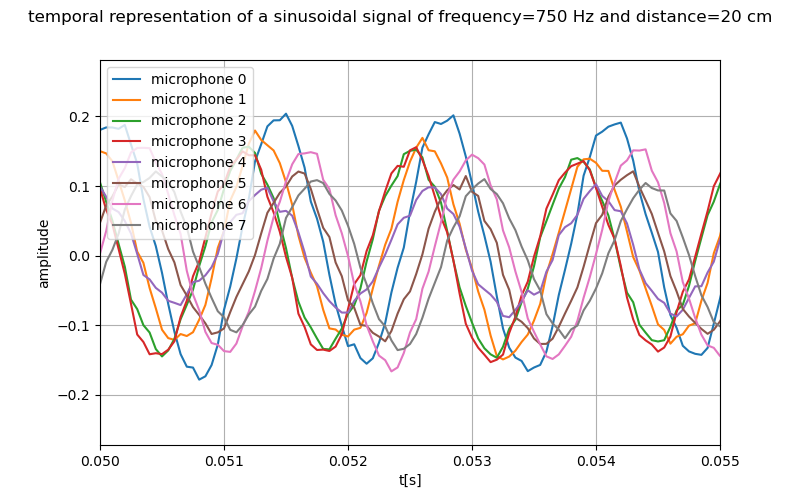

In [7]:
display_time_signal(audio_buffer=m, 
                    indexs_of_buffer=range(8), 
                    xlim=(0.05, 0.055),
                    title='temporal representation of a sinusoidal signal of frequency=750 Hz and distance=20 cm')

<IPython.core.display.Javascript object>


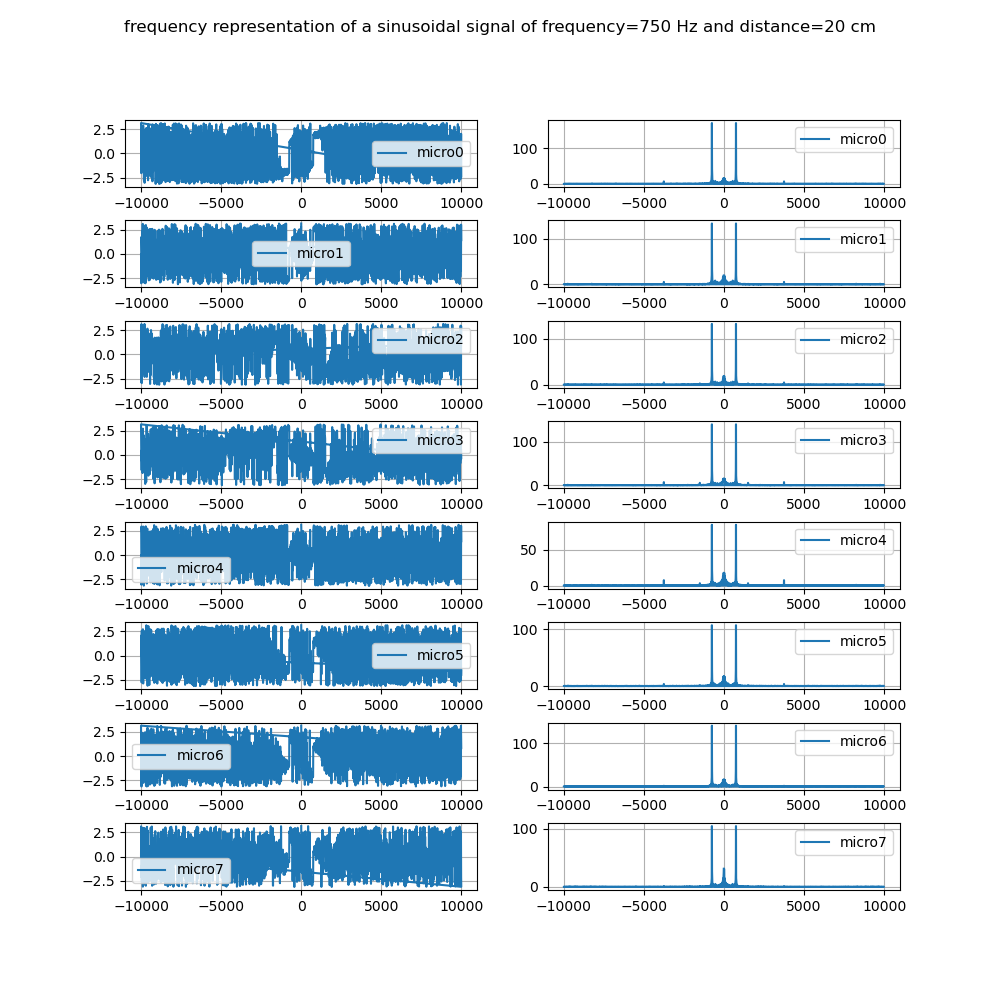

In [8]:
display_frequency_response( audio_buffer=m, 
                            indexs_of_buffer=range(8), 
                            fig_size=(10, 10), 
                            title='frequency representation of a sinusoidal signal of frequency=750 Hz and distance=20 cm')

In [4]:
#distance=40 cm
antenne = array('play')

In [7]:
Fs = antenne.fs
BLK = antenne.blocksize
N = antenne.mems_nb
d = antenne.interspace

# Read an audio buffer
m = antenne.read()

<IPython.core.display.Javascript object>


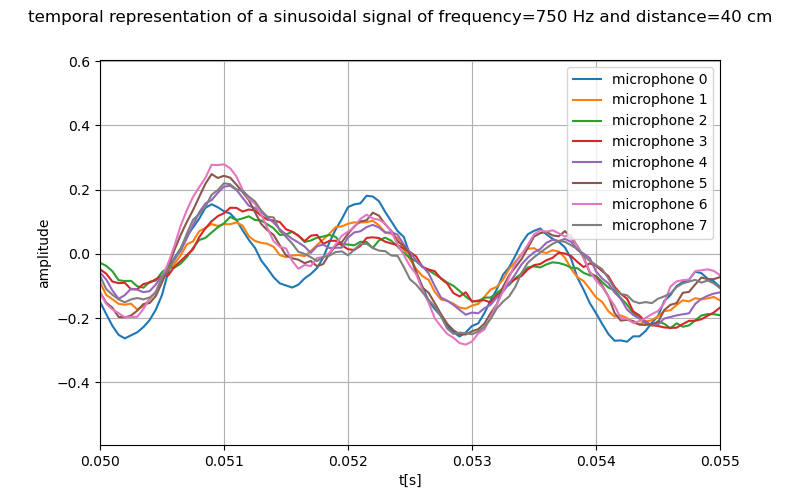

In [10]:
display_time_signal(audio_buffer=m, 
                    indexs_of_buffer=range(8), 
                    xlim=(0.05, 0.055),
                    title='temporal representation of a sinusoidal signal of frequency=750 Hz and distance=40 cm')

<IPython.core.display.Javascript object>


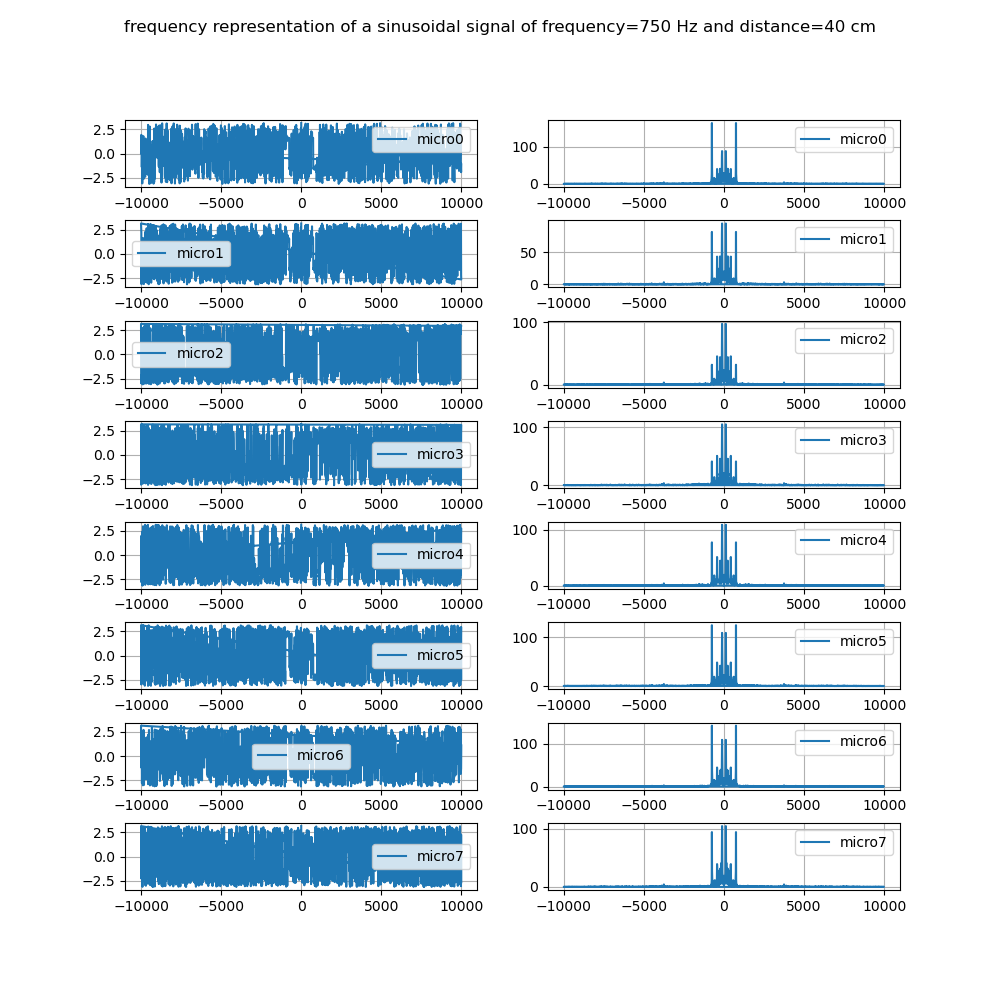

In [11]:
display_frequency_response( audio_buffer=m, 
                            indexs_of_buffer=range(8), 
                            fig_size=(10, 10), 
                            title='frequency representation of a sinusoidal signal of frequency=750 Hz and distance=40 cm')

In [2]:
#distance=80 cm
antenne = array('play')

In [3]:
Fs = antenne.fs
BLK = antenne.blocksize
N = antenne.mems_nb
d = antenne.interspace

# Read an audio buffer
m = antenne.read()

<IPython.core.display.Javascript object>


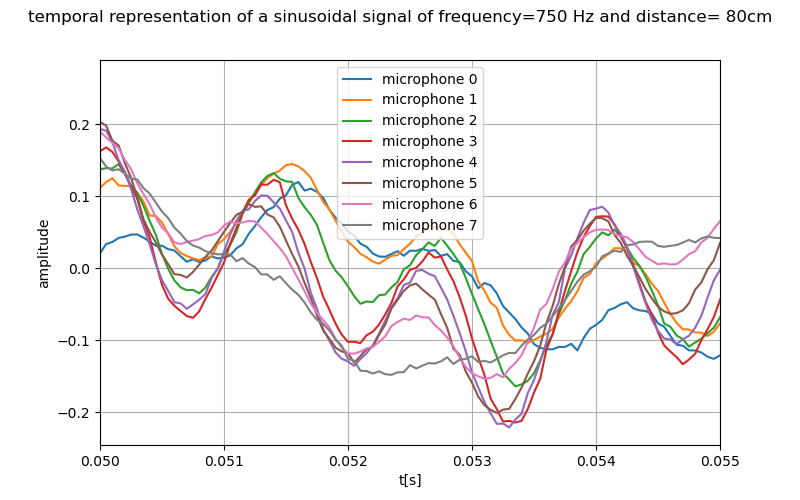

In [6]:
display_time_signal(audio_buffer=m, 
                    indexs_of_buffer=range(8), 
                    xlim=(0.05, 0.055),
                    title='temporal representation of a sinusoidal signal of frequency=750 Hz and distance= 80cm')

<IPython.core.display.Javascript object>


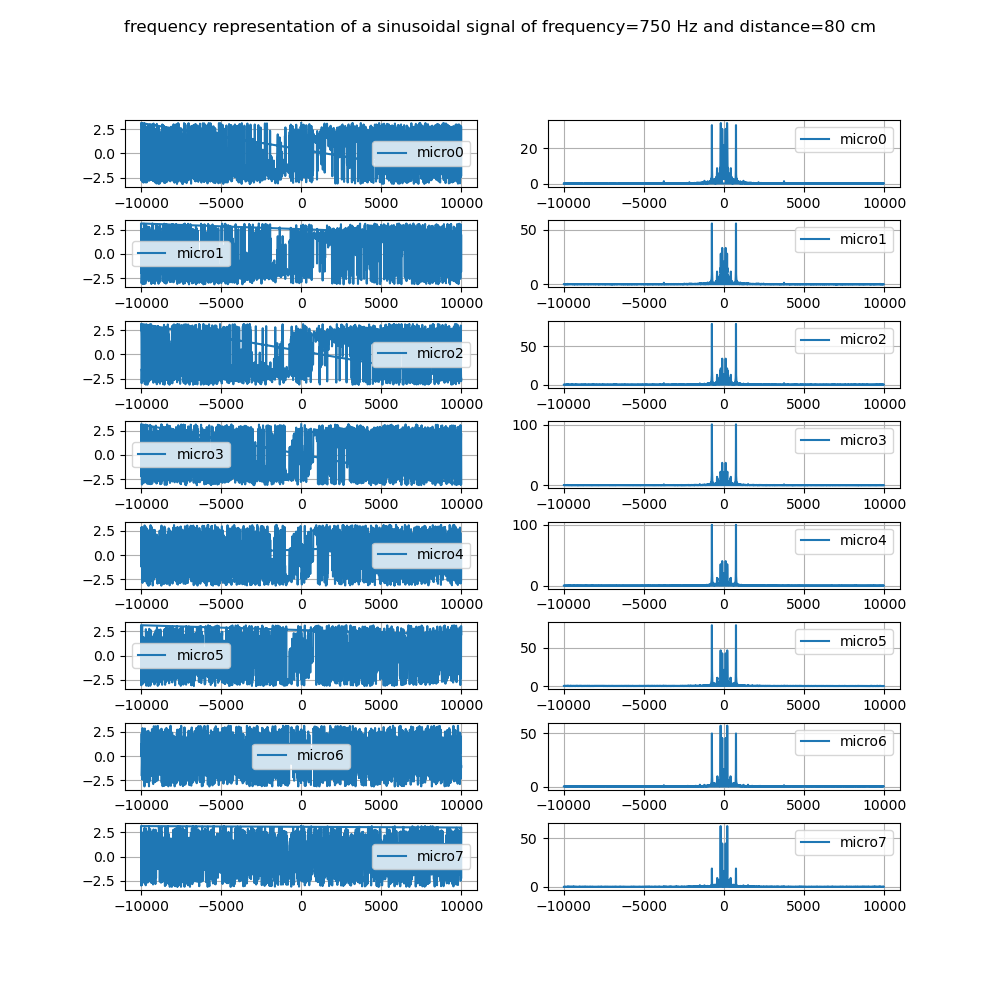

In [7]:
display_frequency_response( audio_buffer=m, 
                            indexs_of_buffer=range(8), 
                            fig_size=(10, 10), 
                            title='frequency representation of a sinusoidal signal of frequency=750 Hz and distance=80 cm')

In [2]:
#distance=1 m
antenne = array('play')

In [3]:
Fs = antenne.fs
BLK = antenne.blocksize
N = antenne.mems_nb
d = antenne.interspace

# Read an audio buffer
m = antenne.read()

<IPython.core.display.Javascript object>


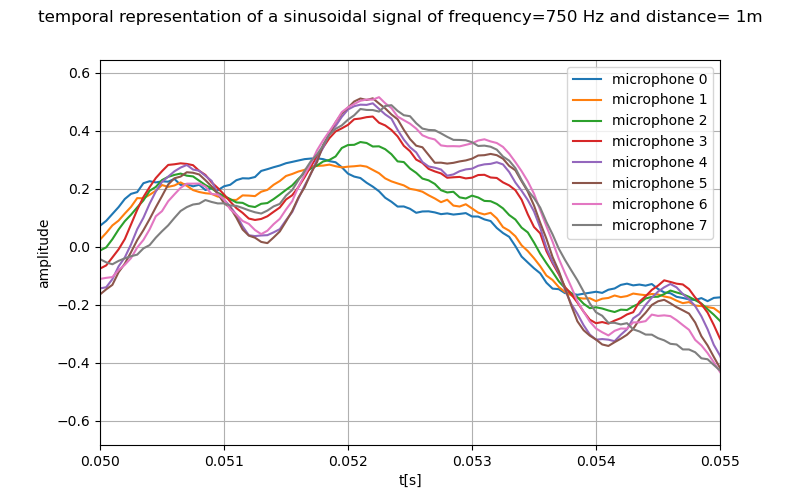

In [6]:
display_time_signal(audio_buffer=m, 
                    indexs_of_buffer=range(8), 
                    xlim=(0.05, 0.055),
title='temporal representation of a sinusoidal signal of frequency=750 Hz and distance= 1m')

<IPython.core.display.Javascript object>


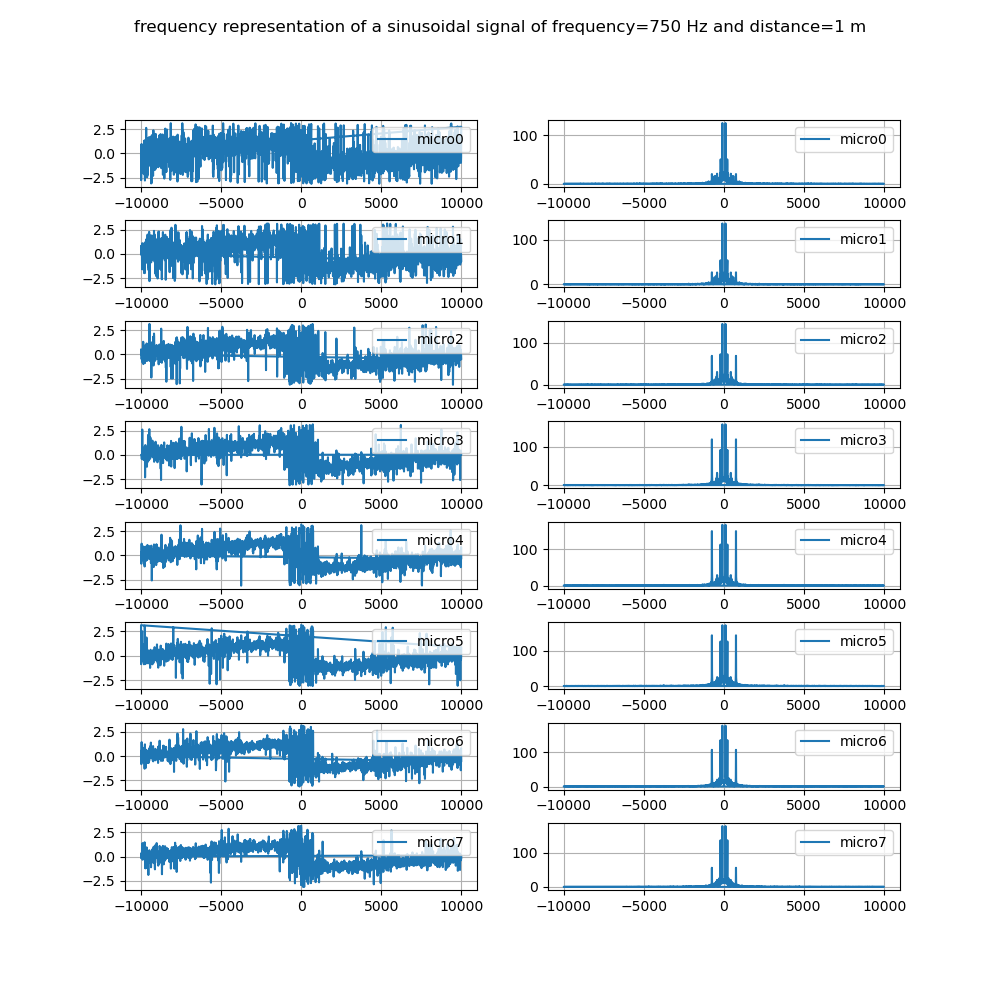

In [7]:
display_frequency_response( audio_buffer=m, 
                            indexs_of_buffer=range(8), 
                            fig_size=(10, 10), 
                           title='frequency representation of a sinusoidal signal of frequency=750 Hz and distance=1 m')

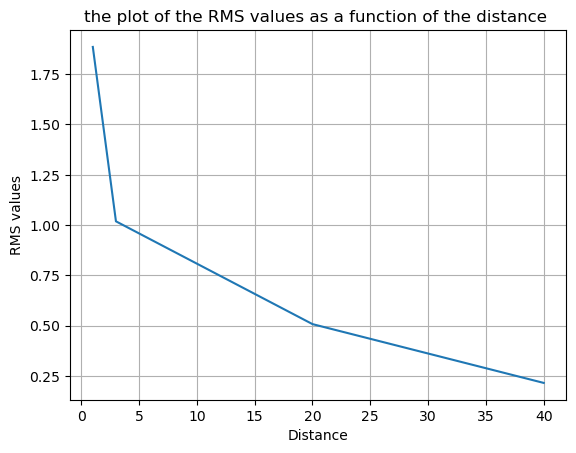

In [13]:
RMS_1 = 1.8853393156843765
RMS_20 = 1.0189124966636601
RMS_40 = 0.5082643573000894
RMS_80 = 0.2161357006197268
RMS = [RMS_1 , RMS_20 , RMS_40 , RMS_80]
distance = [1 , 3 , 20 , 40]

plt.plot(distance , RMS); 
plt.title('the plot of the RMS values as a function of the distance ')
plt.xlabel('Distance')
plt.ylabel('RMS values')
plt.grid()

RMS uses the amplitude of a signal as a measure of signal strength. The magnitude is calculated by squaring each sample, so whatever the signal values are (positive or negative) will not matter. More precisely, the RMS level is the square root of the arithmetic mean of the squared signal. This explains the attenuation of the RMS with increasing distance from the source to the microphone array.   

### 1.2.4 Wave fronts

#### Q.16, Q.17 ans Q.18

Xs=1m and Ys=0
so theta_s=artan(Xs/Ys)= 90°.

In [2]:
antenne=array('play') # When playing recorded files (can work without acquisition system)

In [3]:
# Load acquisition and array parameters from the antenne variable, AFTER launching acquisition or play
Fs = antenne.fs
BLK = antenne.blocksize
N = antenne.mems_nb
d = antenne.interspace

# Read an audio buffer
m = antenne.read()

<IPython.core.display.Javascript object>


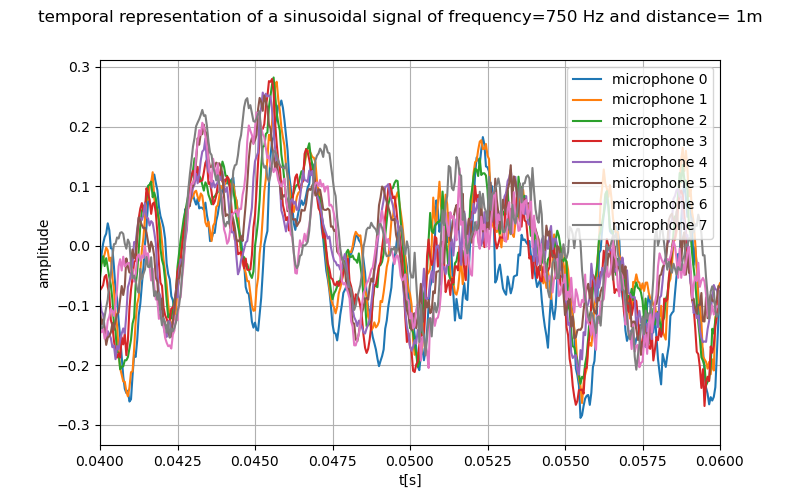

In [6]:

display_time_signal(audio_buffer=m, 
                    indexs_of_buffer=range(8), 
                    title='temporal representation of a sinusoidal signal of frequency=750 Hz and distance= 1m')


<IPython.core.display.Javascript object>


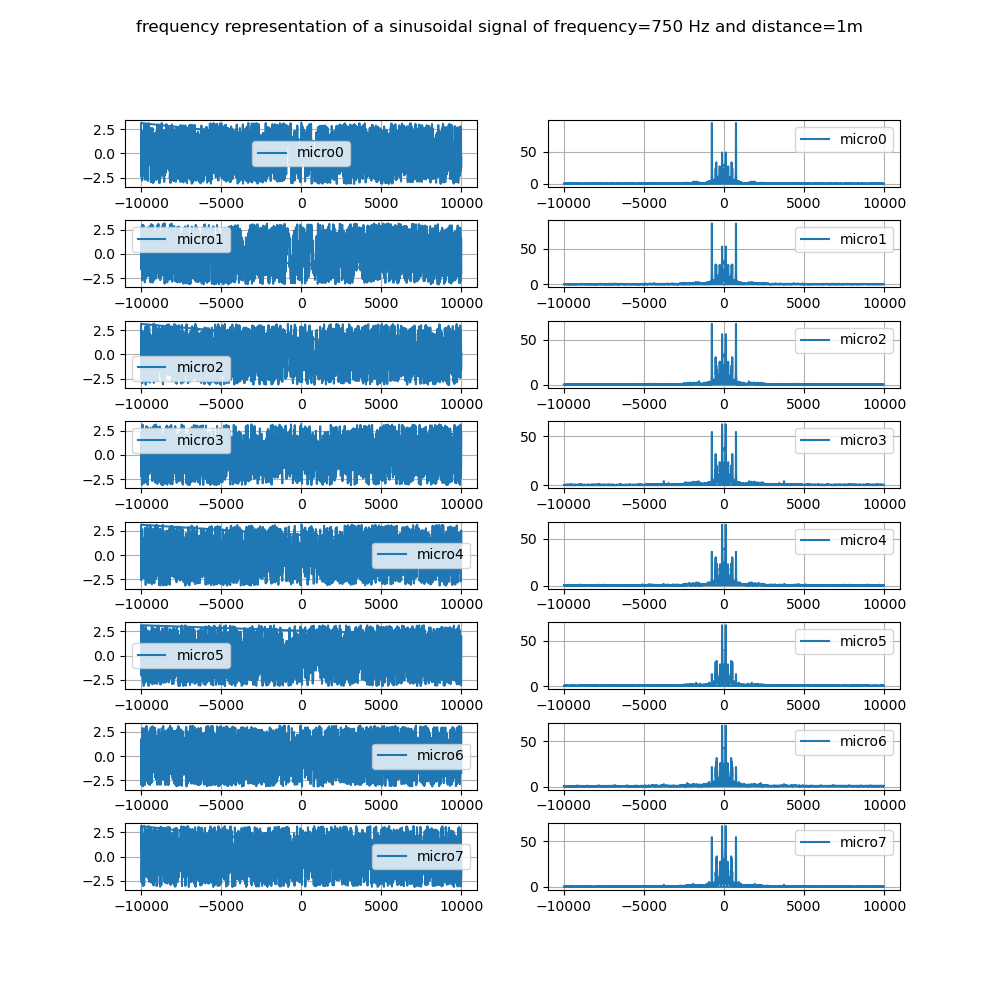

In [7]:
display_frequency_response( audio_buffer=m, 
                            indexs_of_buffer=range(8), 
                            fig_size=(10, 10), 
                            title='frequency representation of a sinusoidal signal of frequency=750 Hz and distance=1m')

$\delta _{1,5}$ = 0.39ms \
$\delta _{2,5}$ = 0.27ms\
$\delta _{3,5}$ = 0.12ms\
$\delta _{4,5}$ = 0.11ms\
$\delta _{5,5}$ = 0ms\
$\delta _{6,5}$ = -0.07ms\
$\delta _{7,5}$ = -0.13ms\
$\delta _{8,5}$ = -0.22ms

$\delta _{1,4}$ = 0.32ms\
$\delta _{2,4}$ = 0.23ms\
$\delta _{3,4}$ = 0.09ms\
$\delta _{4,4}$ = 0ms\
$\delta _{5,4}$ = -0.06ms\
$\delta _{6,4}$ = -0.15ms\
$\delta _{7,4}$ = -0.22ms\
$\delta _{8,4}$ = -0.39ms

In [21]:
d = 0.06
N = 8
n = np.arange(1,9,1)

delta_i_5 = np.array([0.39,0.27,0.12,0.11,0,-0.07,-0.13,-0.22])*10**(-3)
delta_i_4 = np.array([0.32,0.23,0.09,0,-0.06,-0.15,-0.22,-0.39])*10**(-3)

delta_n = (delta_i_5 + delta_i_4)/2
print(delta_n)

[ 3.55e-04  2.50e-04  1.05e-04  5.50e-05 -3.00e-05 -1.10e-04 -1.75e-04
 -3.05e-04]


<IPython.core.display.Javascript object>


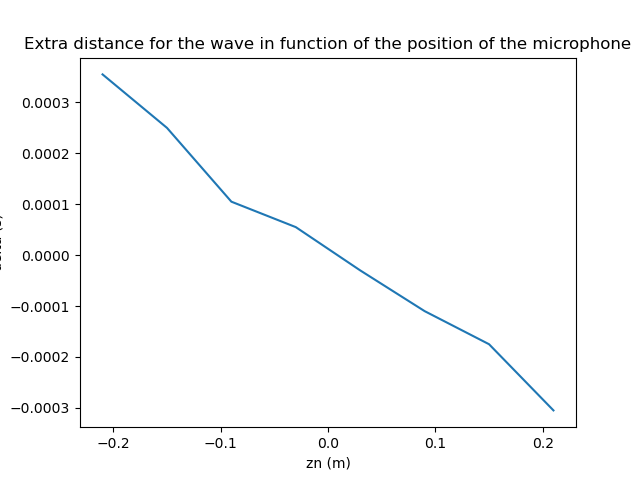

Text(0, 0.5, 'delta (s)')

In [23]:
zn = d*(n-N/2) - d/2
plt.figure()
plt.plot(zn, delta_n)
plt.title("Extra distance for the wave in function of the position of the microphone")
plt.xlabel("zn (m)")
plt.ylabel("delta (s)")

By analyzing the figure, one can see that even if the source is approaching the antenna, the
delay increases the further away from the origin O (where the source is positioned). And
so we can deduce that the time necessary for the wave to arrive at the microphone number 8 is the time needed for it to arrive at microphone 7, to which we add the delay ofmicrophone 8.

This shows that we are not yet in the case of a far field.

Xs=42 cm and Ys=0

In [3]:
antenne=array('play') # When playing recorded files (can work without acquisition system)

In [7]:
# Load acquisition and array parameters from the antenne variable, AFTER launching acquisition or play
Fs = antenne.fs
BLK = antenne.blocksize
N = antenne.mems_nb
d = antenne.interspace

# Read an audio buffer
m = antenne.read()

<IPython.core.display.Javascript object>


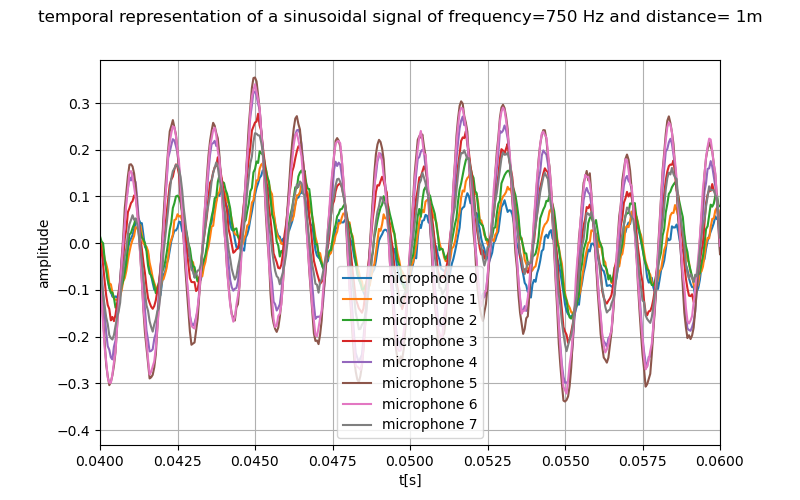

In [11]:

display_time_signal(audio_buffer=m, 
                    indexs_of_buffer=range(8), 
                    title='temporal representation of a sinusoidal signal of frequency=750 Hz and distance= 1m')

<IPython.core.display.Javascript object>


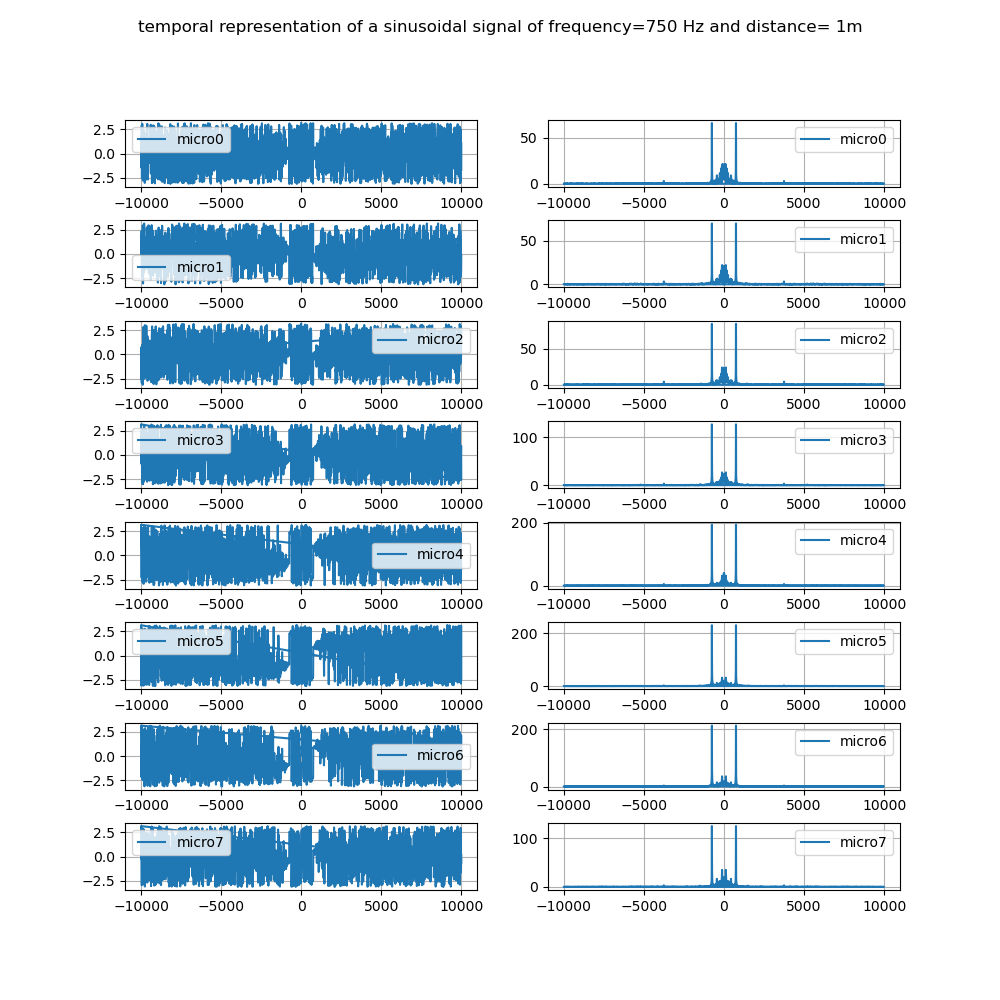

In [12]:
display_frequency_response( audio_buffer=m, 
                            indexs_of_buffer=range(8), 
                            fig_size=(10, 10), 
                            title='temporal representation of a sinusoidal signal of frequency=750 Hz and distance= 1m')